# The Sparks Foundation - GRIP - Data Science and Business Analytics - November -2021¶
Name - Neha Waghmare

Task 2: Prediction using Unsupervised ML

Level : Beginner

Software-Jupyter Notebook

DataSet can be downloaded from this link :- https://bit.ly/3kXTdox

Problem statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

# Importing Libraries

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')


# Read the libraries

In [26]:
data=pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratary Data Analysis (EDA)

In [27]:
data.head() # first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
data.tail() # last 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
data.shape # no. of rows and cols in data

(150, 6)

In [30]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [32]:
data.rename(columns={'SepalLengthCm':'Sepal_Length', 'SepalWidthCm':'Sepal_Width','PetalLengthCm':'Petal_Length','PetalWidthCm':'Petal_Width'}, inplace=True)

In [33]:
data['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)

In [34]:
data=data.drop("Id", axis=1)
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Checking Null Values

In [35]:
data.isna().sum()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization

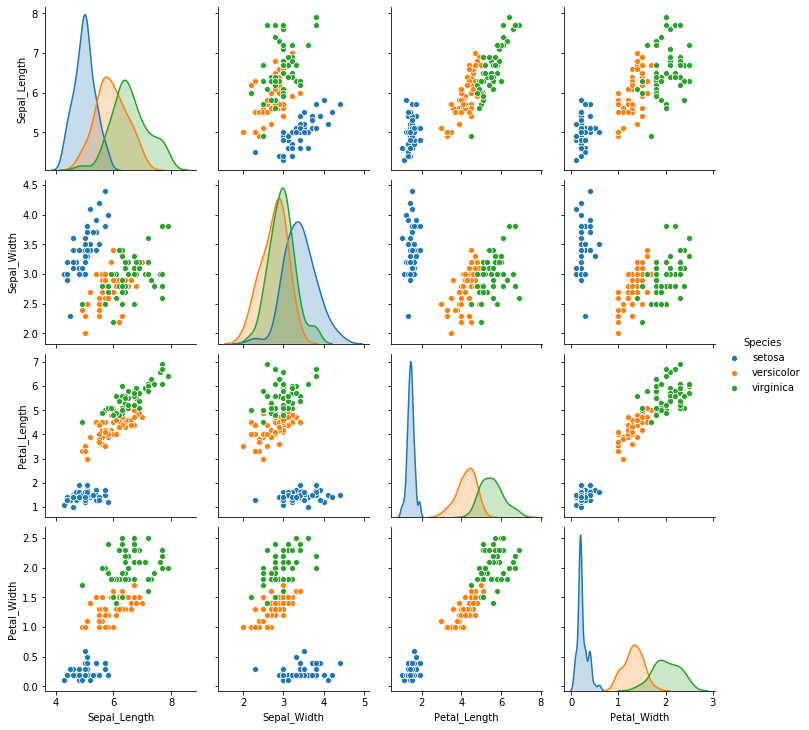

In [38]:
sns.pairplot(data,hue='Species')

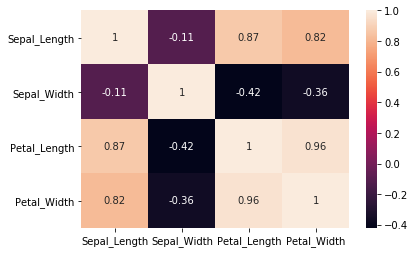

In [39]:
sns.heatmap(data.corr(),annot=True)

In [40]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

# Plotting the Elbow Graph to find the Optimal Value of 'K'

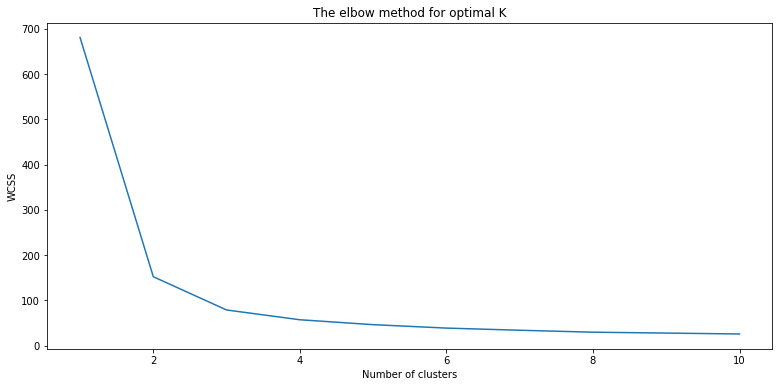

In [41]:
plt.figure(figsize=(13,6))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method for optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Implementing K-Means Clustering
Applying k-means to the dataset.

Creating the k-means classifier.

# Applying K-Means cluster when number of clusters is 2

In [42]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=3)
iris_k_model.fit(x)
print(iris_k_model.labels_)
print(iris_k_model.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


Text(0.5, 1.0, 'K-Means Clustering using n_cluster=2')

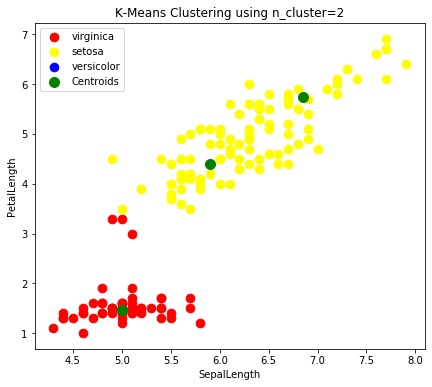

In [46]:
plt.figure(figsize=(7,6))
plt.scatter(data.iloc[y_kmeans==0,0],data.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(data.iloc[y_kmeans==1,0],data.iloc[y_kmeans==1,2],s=75,c='yellow',label='setosa')
plt.scatter(data.iloc[y_kmeans==2,0],data.iloc[y_kmeans==2,2],s=75,c='blue',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='green',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering using n_cluster=2')

# Applying K-Means cluster when number of clusters is 4

In [47]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
iris_k_model = KMeans(n_clusters=4)
iris_k_model.fit(x)
print(iris_k_model.labels_)
print(iris_k_model.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 2 2 2 0 0 0 0 2 0 2 2 2 0 0 0 2 0 0 0 0 0 2 0 0 3 2 3 3 3 3 0 3 3 3 2
 2 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 2
 3 2]
[[5.53214286 2.63571429 3.96071429 1.22857143]
 [5.006      3.418      1.464      0.244     ]
 [6.2525     2.855      4.815      1.625     ]
 [6.9125     3.1        5.846875   2.13125   ]]


Text(0.5, 1.0, 'K-Means Clustering using n_cluster=4')

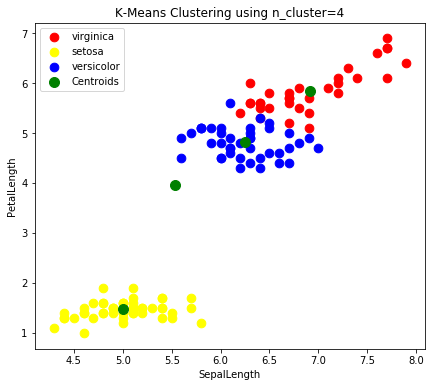

In [49]:
plt.figure(figsize=(7,6))
plt.scatter(data.iloc[y_kmeans==0,0],data.iloc[y_kmeans==0,2],s=75,c='red',label='virginica')
plt.scatter(data.iloc[y_kmeans==1,0],data.iloc[y_kmeans==1,2],s=75,c='yellow',label='setosa')
plt.scatter(data.iloc[y_kmeans==2,0],data.iloc[y_kmeans==2,2],s=75,c='blue',label='versicolor')
plt.scatter(iris_k_model.cluster_centers_[:,0],iris_k_model.cluster_centers_[:,2],s=100,c='green',label='Centroids')
plt.legend()
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.title('K-Means Clustering using n_cluster=4')

# We can see that when number of clusters is 2 it forms a better cluster formation when compared to number of clusters is 4 as we also see in the elbow graph